In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data cleaning
sheets_dict = pd.read_excel("Data_for_project.xlsx", sheet_name=None)
# df_usd = pd.read_excel("Data_with_usd.xlsx", sheet_name='USD')

# Access each DataFrame using the sheet name as key
df_aus = sheets_dict['AUD']
df_cad = sheets_dict['CAD']
df_chf = sheets_dict['CHF']
df_usd = sheets_dict['USD']


def clean_df(df):
    df.columns = df.iloc[2]
    df = df.drop(df.index[:3])
    df = df.drop(df.index[:2])
    df = df.rename(columns={df.columns[0]: 'Timestamp'}) 
    return df

def calculate_7day_rolling_average(df):
    # Temporarily set the 'Timestamp' as the index
    df_temp = df.copy()
    df_temp['Timestamp'] = pd.to_datetime(df_temp['Timestamp'])
    df_temp.set_index('Timestamp', inplace=True)

    # Calculate the 7-day rolling average
    rolling_df = df_temp.rolling(window=7, min_periods=1).mean()

    # Reset the index back to the original
    rolling_df.reset_index(inplace=True)

    return rolling_df



In [3]:
df_aus = clean_df(df_aus)
df_cad = clean_df(df_cad)
df_chf = clean_df(df_chf)
df_usd = clean_df(df_usd)
# usd_10 = clean_df(df_usd_10)
df_aus = calculate_7day_rolling_average(df_aus)
df_cad = calculate_7day_rolling_average(df_cad)
df_chf = calculate_7day_rolling_average(df_chf)
df_usd = calculate_7day_rolling_average(df_usd)
# usd_10 = calculate_7day_rolling_average(usd_10)
# df_usd['USSW10 Curncy'] = usd_10['USSW10 Curncy']
df_chf = df_chf.loc[:,~df_chf.columns.duplicated()].copy()

In [4]:
df_usd

2,Timestamp,US0003M Index,USSW1 Curncy,USSW2 Curncy,USSW3 Curncy,USSW5 Curncy,USSW7 Curncy,USSW10 Curncy,USBA1 Curncy,USBA2 Curncy,...,USBC5 Curncy,USBC7 Curncy,USBC10 Curncy,C0823M Index,C0821Y Index,C0822Y Index,C0823Y Index,C0825Y Index,C0827Y Index,C08210Y Index
0,NaT,6.001250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-04,6.021875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.6500,6.1400,6.3100,6.3900,6.3900,6.620,6.5000
2,2000-01-05,6.024583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.6450,6.1800,6.3300,6.4200,6.4350,6.670,6.5550
3,2000-01-06,6.025938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.6300,6.1800,6.3200,6.4100,6.4300,6.660,6.5500
4,2000-01-07,6.026750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.6200,6.1925,6.3175,6.4025,6.4275,6.655,6.5450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6323,2024-03-28,5.572763,5.665,5.103,4.676,4.219,4.012,3.8605,15.125,15.15,...,16.375,16.125,16.3,5.3653,4.9062,4.3330,4.1297,4.0159,4.015,4.0317
6324,2024-03-29,5.568436,5.665,5.103,4.676,4.219,4.012,3.8605,15.125,15.15,...,16.375,16.125,16.3,5.3653,4.9062,4.3330,4.1297,4.0159,4.015,4.0317
6325,2024-04-01,5.565331,5.665,5.103,4.676,4.219,4.012,3.8605,15.125,15.15,...,16.375,16.125,16.3,5.3653,4.9062,4.3330,4.1297,4.0159,4.015,4.0317
6326,2024-04-02,5.564709,5.665,5.103,4.676,4.219,4.012,3.8605,15.125,15.15,...,16.375,16.125,16.3,5.3653,4.9062,4.3330,4.1297,4.0159,4.015,4.0317


In [5]:
df_aus_1y = df_aus.loc[:, ['Timestamp', df_aus.columns[-6]]]
df_cad_1y = df_cad.loc[:, ['Timestamp', df_cad.columns[-6]]]
df_chf_1y = df_chf.loc[:, ['Timestamp', df_chf.columns[-6]]]
df_usd_1y = df_usd.loc[:, ['Timestamp', df_usd.columns[-6]]]

In [6]:
df_aus_5y = df_aus.loc[:, ['Timestamp', df_aus.columns[-3]]]
df_cad_5y = df_cad.loc[:, ['Timestamp', df_cad.columns[-3]]]
df_chf_5y = df_chf.loc[:, ['Timestamp', df_chf.columns[-3]]]
df_usd_5y = df_usd.loc[:, ['Timestamp', df_usd.columns[-3]]]

In [7]:
df_aus_10y = df_aus.loc[:, ['Timestamp', df_aus.columns[-1]]]
df_cad_10y = df_cad.loc[:, ['Timestamp', df_cad.columns[-1]]]
df_chf_10y = df_chf.loc[:, ['Timestamp', df_chf.columns[-1]]]
df_usd_10y = df_usd.loc[:, ['Timestamp', df_usd.columns[-1]]]

In [8]:
df_aus_1y['aud_irs'] = df_aus['ADSWAP1 Curncy']
df_aus_1y['aud_bs'] = df_aus['ADBS1 Curncy'] / 100
df_aus_1y['usd_irs'] = df_usd['USSW1 Curncy']
df_aus_1y['aud_rho'] = df_aus_1y['aud_irs'] + df_aus_1y['aud_bs'] - df_aus_1y['usd_irs']

In [9]:
df_aus_5y['aud_irs'] = df_aus['ADSWAP5 Curncy']
df_aus_5y['aud_bs'] = df_aus['ADBS5 Curncy'] / 100
df_aus_5y['usd_irs'] = df_usd['USSW5 Curncy']
df_aus_5y['aud_rho'] = df_aus_5y['aud_irs'] + df_aus_5y['aud_bs'] - df_aus_5y['usd_irs']

In [10]:
df_aus_10y['aud_irs'] = df_aus['ADSWAP10 Curncy']
df_aus_10y['aud_bs'] = df_aus['ADBS10 Curncy'] / 100
df_aus_10y['usd_irs'] = df_usd['USSW10 Curncy']
df_aus_10y['aud_rho'] = df_aus_10y['aud_irs'] + df_aus_10y['aud_bs'] - df_aus_10y['usd_irs']

In [11]:
df_cad_1y['cad_irs'] = df_cad['CDSW1 Curncy']
df_cad_1y['cad_bs'] = df_cad['CDBS1 Curncy'] / 100
df_cad_1y['usd_irs'] = df_usd['USSW1 Curncy']
df_cad_1y['cad_rho'] = df_cad_1y['cad_irs'] + df_cad_1y['cad_bs'] - df_cad_1y['usd_irs']

In [12]:
df_cad_5y['cad_irs'] = df_cad['CDSW5 Curncy']
df_cad_5y['cad_bs'] = df_cad['CDBS5 Curncy'] / 100
df_cad_5y['usd_irs'] = df_usd['USSW5 Curncy']
df_cad_5y['cad_rho'] = df_cad_5y['cad_irs'] + df_cad_5y['cad_bs'] - df_cad_5y['usd_irs']

In [13]:
df_cad_10y['cad_irs'] = df_cad['CDSW10 Curncy']
df_cad_10y['cad_bs'] = df_cad['CDBS10 Curncy'] / 100
df_cad_10y['usd_irs'] = df_usd['USSW10 Curncy']
df_cad_10y['cad_rho'] = df_cad_10y['cad_irs'] + df_cad_10y['cad_bs'] - df_cad_10y['usd_irs']

In [14]:
df_chf_1y['chf_irs'] = df_chf['SFSW1 Curncy']
df_chf_1y['chf_bs'] = df_chf['SFBS1 Curncy'] / 100
df_chf_1y['usd_irs'] = df_usd['USSW1 Curncy']
df_chf_1y['chf_rho'] = df_chf_1y['chf_irs'] + df_chf_1y['chf_bs'] - df_chf_1y['usd_irs']

In [15]:
df_chf_5y['chf_irs'] = df_chf['SFSW5 Curncy']
df_chf_5y['chf_bs'] = df_chf['SFBS5 Curncy'] / 100
df_chf_5y['usd_irs'] = df_usd['USSW5 Curncy']
df_chf_5y['chf_rho'] = df_chf_5y['chf_irs'] + df_chf_5y['chf_bs'] - df_chf_5y['usd_irs']

In [16]:
df_chf_10y['chf_irs'] = df_chf['SFSW10 Curncy']
df_chf_10y['chf_bs'] = df_chf['SFBS10 Curncy'] / 100
df_chf_10y['usd_irs'] = df_usd['USSW10 Curncy']
df_chf_10y['chf_rho'] = df_chf_10y['chf_irs'] + df_chf_10y['chf_bs'] - df_chf_10y['usd_irs']

In [17]:
df_usd_1y

2,Timestamp,C0821Y Index
0,NaT,NaN
1,2000-01-04,6.1400
2,2000-01-05,6.1800
3,2000-01-06,6.1800
4,2000-01-07,6.1925
...,...,...
6323,2024-03-28,4.9062
6324,2024-03-29,4.9062
6325,2024-04-01,4.9062
6326,2024-04-02,4.9062


In [18]:
df_aus_1y['us_treasury_premium_aus'] = df_aus_1y['C1271Y Index'] - df_aus_1y['aud_rho'] - df_usd_1y['C0821Y Index']
df_cad_1y['us_treasury_premium_cad'] = df_cad_1y['C1011Y Index'] - df_cad_1y['cad_rho'] - df_usd_1y['C0821Y Index']
df_chf_1y['us_treasury_premium_chf'] = df_chf_1y['C2561Y Index'] - df_chf_1y['chf_rho'] - df_usd_1y['C0821Y Index']

In [19]:
df_aus_5y['us_treasury_premium_aus'] = df_aus_5y['C1275Y Index'] - df_aus_5y['aud_rho'] - df_usd_5y['C0825Y Index']
df_cad_5y['us_treasury_premium_cad'] = df_cad_5y['C1015Y Index'] - df_cad_5y['cad_rho'] - df_usd_5y['C0825Y Index']
df_chf_5y['us_treasury_premium_chf'] = df_chf_5y['C2565Y Index'] - df_chf_5y['chf_rho'] - df_usd_5y['C0825Y Index']

In [20]:
df_aus_10y['us_treasury_premium_aus'] = df_aus_10y['C12710Y Index'] - df_aus_10y['aud_rho'] - df_usd_10y['C08210Y Index']
df_cad_10y['us_treasury_premium_cad'] = df_cad_10y['C10110Y Index'] - df_cad_10y['cad_rho'] - df_usd_10y['C08210Y Index']
df_chf_10y['us_treasury_premium_chf'] = df_chf_10y['C25610Y Index'] - df_chf_10y['chf_rho'] - df_usd_10y['C08210Y Index']

In [21]:
df_usd_1y['ustp_mean'] = 100*(df_aus_1y['us_treasury_premium_aus']+df_cad_1y['us_treasury_premium_cad']+df_chf_1y['us_treasury_premium_chf'])/3

In [22]:
df_usd_5y['ustp_mean'] = 100*(df_aus_5y['us_treasury_premium_aus']+df_cad_5y['us_treasury_premium_cad']+df_chf_5y['us_treasury_premium_chf'])/3

In [23]:
df_usd_10y['ustp_mean'] = 100*(df_aus_10y['us_treasury_premium_aus']+df_cad_10y['us_treasury_premium_cad']+df_chf_10y['us_treasury_premium_chf'])/3

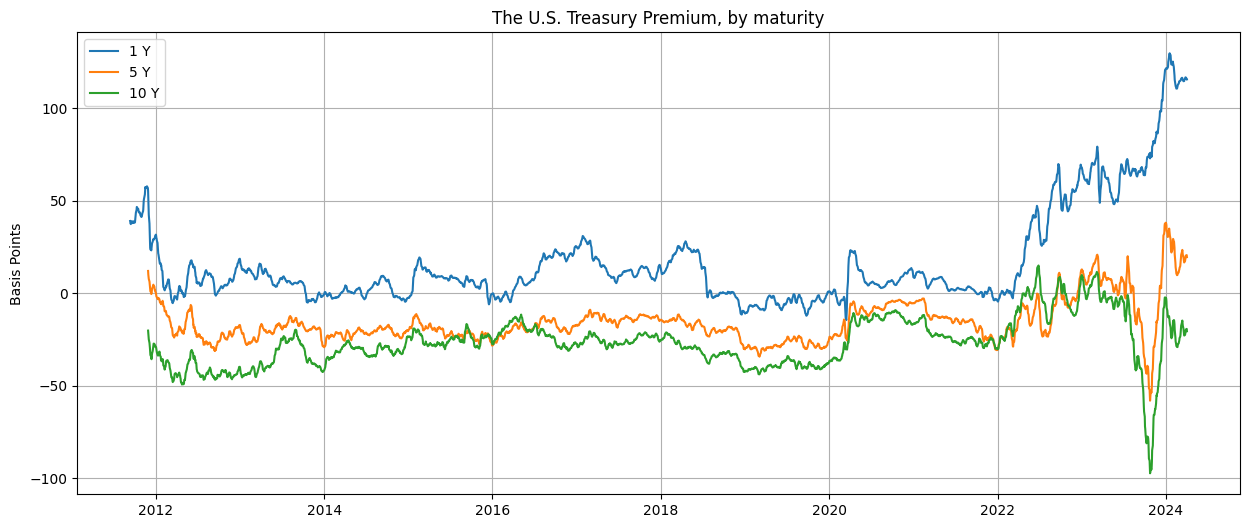

In [24]:
plt.figure(figsize=(15, 6))
plt.plot(df_usd_1y['Timestamp'], df_usd_1y['ustp_mean'], label='1 Y')
plt.plot(df_usd_5y['Timestamp'], df_usd_5y['ustp_mean'], label='5 Y')
plt.plot(df_usd_10y['Timestamp'], df_usd_10y['ustp_mean'], label='10 Y')

plt.ylabel('Basis Points')
plt.title("The U.S. Treasury Premium, by maturity")
plt.legend()
plt.grid(True)

In [25]:
# Cross-country Mean 10 year US treasury premium: df_usd_10y['ustp_mean']

In [26]:
df_aus_5y['swap_spread'] = 100*(df_aus_5y['aud_irs'] - df_aus_5y['C1275Y Index'])
df_cad_5y['swap_spread'] = 100*(df_cad_5y['cad_irs'] - df_cad_5y['C1015Y Index'])
df_chf_5y['swap_spread'] = 100*(df_chf_5y['chf_irs'] - df_chf_5y['C2565Y Index'])
df_usd_5y['swap_spread'] = 100*(df_usd_5y['C0825Y Index'] - df_aus_5y['usd_irs'])
df_usd_5y['non_usd_ss'] = (df_aus_5y['swap_spread']+df_cad_5y['swap_spread']+df_chf_5y['swap_spread'])/3
# If it's not a numeric type, convert it to float
df_aus_5y['swap_spread'] = pd.to_numeric(df_aus_5y['swap_spread'], errors='coerce')
df_cad_5y['swap_spread'] = pd.to_numeric(df_cad_5y['swap_spread'], errors='coerce')
df_chf_5y['swap_spread'] = pd.to_numeric(df_chf_5y['swap_spread'], errors='coerce')
df_usd_5y['swap_spread'] = pd.to_numeric(df_usd_5y['swap_spread'], errors='coerce')
df_usd_5y['non_usd_ss'] = pd.to_numeric(df_usd_5y['non_usd_ss'], errors='coerce')

In [27]:
df_aus_5y['Timestamp'] = pd.to_datetime(df_aus_5y['Timestamp'])
df_cad_5y['Timestamp'] = pd.to_datetime(df_cad_5y['Timestamp'])
df_chf_5y['Timestamp'] = pd.to_datetime(df_chf_5y['Timestamp'])
df_usd_5y['Timestamp'] = pd.to_datetime(df_usd_5y['Timestamp'])
df_aus_5y.set_index('Timestamp', inplace=True)
df_cad_5y.set_index('Timestamp', inplace=True)
df_chf_5y.set_index('Timestamp', inplace=True)
df_usd_5y.set_index('Timestamp', inplace=True)
df_aus_5y = df_aus_5y[pd.notnull(df_aus_5y.index)]
df_cad_5y = df_cad_5y[pd.notnull(df_cad_5y.index)]
df_chf_5y = df_chf_5y[pd.notnull(df_chf_5y.index)]
df_usd_5y = df_usd_5y[pd.notnull(df_usd_5y.index)]

In [28]:
df_aus_5y

2,C1275Y Index,aud_irs,aud_bs,usd_irs,aud_rho,us_treasury_premium_aus,swap_spread
Timestamp,,,,,,,
2000-01-04,6.9000,7.350000,NaN,NaN,NaN,NaN,45.000000
2000-01-05,6.8700,7.305000,NaN,NaN,NaN,NaN,43.500000
2000-01-06,6.8900,7.316667,NaN,NaN,NaN,NaN,42.666667
2000-01-07,6.9025,7.326250,NaN,NaN,NaN,NaN,42.375000
2000-01-10,6.9140,7.338000,NaN,NaN,NaN,NaN,42.400000
...,...,...,...,...,...,...,...
2024-03-27,3.6183,4.037187,0.3386,4.219,0.156787,-0.554387,41.888714
2024-03-28,3.6183,4.025609,0.3386,4.219,0.145209,-0.542809,40.730857
2024-03-29,3.6183,4.019009,0.3386,4.219,0.138609,-0.536209,40.070857


In [29]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.sandwich_covariance import cov_hac
# Define the time periods
full_sample = ('2012', '2024-04-02')  # Adjust these dates as needed
period1 = ('2012', '2019')
period2 = ('2020', '2021')
period3 = ('2022', '2024-04-02')

# Function to calculate mean and standard deviation for a given period
# def calculate_stats(df, start_year, end_year):
#     period_df = df[start_year:end_year]
#     mean = period_df['swap_spread'].mean()
#     nw_se = sm.stats.newey_west(period_df['swap_spread'], lags=91)
#     return mean, nw_se
def calculate_stats(df, start_date, end_date):
    
    period_df = df.loc[start_date:end_date, 'swap_spread']
    mean = period_df.mean()
    model = OLS(period_df, np.ones_like(period_df)).fit()
    nw_cov = cov_hac(model, nlags=91)
    nw_se = np.sqrt(np.diag(nw_cov))
    return mean, nw_se[0]  # Only one regressor here, which is the constant term
# Apply the function to each DataFrame and time period
aus_full_mean, aus_full_ste = calculate_stats(df_aus_5y, *full_sample)
aus_period1_mean, aus_period1_ste = calculate_stats(df_aus_5y, *period1)
aus_period2_mean, aus_period2_ste = calculate_stats(df_aus_5y, *period2)
aus_period3_mean, aus_period3_ste = calculate_stats(df_aus_5y, *period3)

In [30]:
cad_full_mean, cad_full_ste = calculate_stats(df_cad_5y, *full_sample)
cad_period1_mean, cad_period1_ste = calculate_stats(df_cad_5y, *period1)
cad_period2_mean, cad_period2_ste = calculate_stats(df_cad_5y, *period2)
cad_period3_mean, cad_period3_ste = calculate_stats(df_cad_5y, *period3)

In [31]:
chf_full_mean, chf_full_ste = calculate_stats(df_chf_5y, *full_sample)
chf_period1_mean, chf_period1_ste = calculate_stats(df_chf_5y, *period1)
chf_period2_mean, chf_period2_ste = calculate_stats(df_chf_5y, *period2)
chf_period3_mean, chf_period3_ste = calculate_stats(df_chf_5y, *period3)

In [32]:
usd_full_mean, usd_full_ste = calculate_stats(df_usd_5y, *full_sample)
usd_period1_mean, usd_period1_ste = calculate_stats(df_usd_5y, *period1)
usd_period2_mean, usd_period2_ste = calculate_stats(df_usd_5y, *period2)
usd_period3_mean, usd_period3_ste = calculate_stats(df_usd_5y, *period3)

In [33]:
def calculate_stats_nonusd(df, start_date, end_date):
    period_df = df.loc[start_date:end_date, 'non_usd_ss']
    mean = period_df.mean()
    model = OLS(period_df, np.ones_like(period_df)).fit()
    nw_cov = cov_hac(model, nlags=91)
    nw_se = np.sqrt(np.diag(nw_cov))
    return mean, nw_se[0]  # Only one regressor here, which is the constant term
nonusd_full_mean, nonusd_full_ste = calculate_stats_nonusd(df_usd_5y, *full_sample)
nonusd_period1_mean, nonusd_period1_ste = calculate_stats_nonusd(df_usd_5y, *period1)
nonusd_period2_mean, nonusd_period2_ste = calculate_stats_nonusd(df_usd_5y, *period2)
nonusd_period3_mean, nonusd_period3_ste = calculate_stats_nonusd(df_usd_5y, *period3)

In [34]:
results = {
    'AUD': {'full_sample': None, '2012_2019': None, '2020_2021': None, '2022_2024': None},
    'CAD': {'full_sample': None, '2012_2019': None, '2020_2021': None, '2022_2024': None},
    'CHF': {'full_sample': None, '2012_2019': None, '2020_2021': None, '2022_2024': None},
    'NON_USD': {'full_sample': None, '2012_2019': None, '2020_2021': None, '2022_2024': None},
    'USD': {'full_sample': None, '2012_2019': None, '2020_2021': None, '2022_2024': None},
}
results['AUD']['full_sample'] = {'Mean': aus_full_mean, 'Std Error': aus_full_ste}
results['AUD']['2012_2019'] = {'Mean': aus_period1_mean, 'Std Error': aus_period1_ste}
results['AUD']['2020_2021'] = {'Mean': aus_period2_mean, 'Std Error': aus_period2_ste}
results['AUD']['2022_2024'] = {'Mean': aus_period3_mean, 'Std Error': aus_period3_ste}

results['CAD']['full_sample'] = {'Mean': cad_full_mean, 'Std Error': cad_full_ste}
results['CAD']['2012_2019'] = {'Mean': cad_period1_mean, 'Std Error': cad_period1_ste}
results['CAD']['2020_2021'] = {'Mean': cad_period2_mean, 'Std Error': cad_period2_ste}
results['CAD']['2022_2024'] = {'Mean': cad_period3_mean, 'Std Error': cad_period3_ste}

results['CHF']['full_sample'] = {'Mean': chf_full_mean, 'Std Error': chf_full_ste}
results['CHF']['2012_2019'] = {'Mean': chf_period1_mean, 'Std Error': chf_period1_ste}
results['CHF']['2020_2021'] = {'Mean': chf_period2_mean, 'Std Error': chf_period2_ste}
results['CHF']['2022_2024'] = {'Mean': chf_period3_mean, 'Std Error': chf_period3_ste}

results['NON_USD']['full_sample'] = {'Mean': nonusd_full_mean, 'Std Error': nonusd_full_ste}
results['NON_USD']['2012_2019'] = {'Mean': nonusd_period1_mean, 'Std Error': nonusd_period1_ste}
results['NON_USD']['2020_2021'] = {'Mean': nonusd_period2_mean, 'Std Error': nonusd_period2_ste}
results['NON_USD']['2022_2024'] = {'Mean': nonusd_period3_mean, 'Std Error': nonusd_period3_ste}

results['USD']['full_sample'] = {'Mean': usd_full_mean, 'Std Error': usd_full_ste}
results['USD']['2012_2019'] = {'Mean': usd_period1_mean, 'Std Error': usd_period1_ste}
results['USD']['2020_2021'] = {'Mean': usd_period2_mean, 'Std Error': usd_period2_ste}
results['USD']['2022_2024'] = {'Mean': usd_period3_mean, 'Std Error': usd_period3_ste}

In [35]:
# Convert the nested dictionary to a DataFrame
df_results = pd.DataFrame.from_dict({(i,j): results[i][j]
                                     for i in results.keys()
                                     for j in results[i].keys()},
                                     orient='index')

# Give proper names to the multi-level index
df_results.index.names = ['Currency', 'Period']

# Reset the index if you prefer that format
df_results.reset_index(inplace=True)

# Rename columns to match the table format in the image
df_results.columns = ['Currency', 'Period', 'Mean', 'Std Error']

In [37]:
df_results

,Currency,Period,Mean,Std Error
0,AUD,full_sample,33.302784,3.290366
1,AUD,2012_2019,35.502976,3.963297
2,AUD,2020_2021,11.118657,3.798757
3,AUD,2022_2024,45.245714,3.848152
4,CAD,full_sample,36.497135,1.138276
5,CAD,2012_2019,33.300373,1.174201
6,CAD,2020_2021,41.004542,1.453068
7,CAD,2022_2024,43.846826,1.613689
8,CHF,full_sample,2.729366,8.199788
9,CHF,2012_2019,26.816701,1.619248


In [38]:
df_usd_5y['swap_spread']

Timestamp
2000-01-04      NaN
2000-01-05      NaN
2000-01-06      NaN
2000-01-07      NaN
2000-01-10      NaN
              ...  
2024-03-28   -20.31
2024-03-29   -20.31
2024-04-01   -20.31
2024-04-02   -20.31
2024-04-03      NaN
Name: swap_spread, Length: 6327, dtype: float64